In [1]:
%matplotlib inline
import networkx as nx

# グラフの連結性と連結度

## 無向グラフの辺連結度

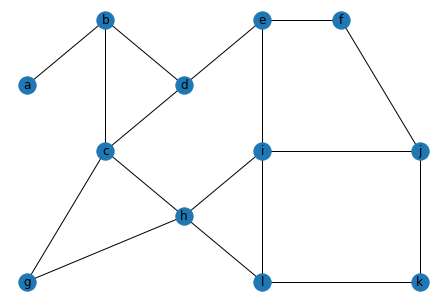

In [2]:
V = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
G1 = nx.Graph()
G1.add_nodes_from(V)
G1.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), ('c', 'h'), \
                   ('d', 'e'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('g', 'h'), ('h', 'i'), \
                   ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
mypos1 = {'a': (0, 15), \
          'b': (5, 20), \
          'c': (5, 10), \
          'd': (10, 15), \
          'e': (15, 20), \
          'f': (20, 20), \
          'g': (0, 0), \
          'h': (10, 5), \
          'i': (15, 10), \
          'j': (25, 10), \
          'k': (25, 0), \
          'l': (15, 0)
        }
nx.draw(G1, pos=mypos1, with_labels=True)

In [3]:
# 辺連結度の計算
from networkx.algorithms.connectivity import local_edge_connectivity
local_edge_connectivity(G1, 'b', 'j')

2

In [4]:
# 大域辺連結度の計算
nx.edge_connectivity(G1)

1

## 無向グラフの点連結度

In [5]:
# 点連結度の計算
from networkx.algorithms.connectivity import local_node_connectivity
local_node_connectivity(G1, 'g', 'k')

2

In [6]:
# 大域点連結度の計算
nx.node_connectivity(G1)

1

## 有向グラフの弧連結度・点連結度

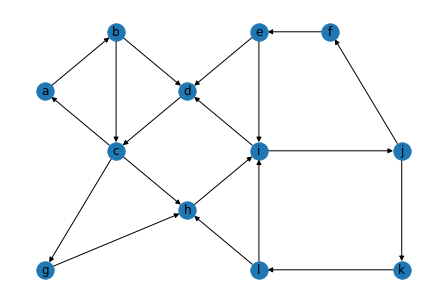

In [7]:
G2 = nx.DiGraph()
G2.add_nodes_from(V)
G2.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('c', 'g'), ('c', 'h'), \
                   ('e', 'd'), ('f', 'e'), ('e', 'i'), ('j', 'f'), ('g', 'h'), ('h', 'i'), \
                   ('l', 'h'), ('i', 'j'), ('l', 'i'), ('j', 'k'), ('k', 'l'), ('c', 'a'), \
                   ('i', 'd')])
nx.draw(G2, pos = mypos1, with_labels=True)

In [8]:
# 強連結性の判定
nx.is_strongly_connected(G2)

True

In [9]:
# 弧連結度の計算
from networkx.algorithms.connectivity import local_edge_connectivity
local_edge_connectivity(G2, 'e', 'k')

1

In [10]:
# 弧連結度は，始点と終点を交換した場合，異なることがある
[local_edge_connectivity(G2, 'b', 'h'), local_edge_connectivity(G2, 'h', 'b')]

[2, 1]

In [11]:
# 大域弧連結度の計算
nx.edge_connectivity(G2)

1

In [12]:
# 点連結度の計算
from networkx.algorithms.connectivity import local_node_connectivity
local_node_connectivity(G2, 'c', 'i')

1

In [13]:
# 大域点連結度の計算
nx.node_connectivity(G2)

1

# 連結度と互いに素な道の双対性：Mengerの定理

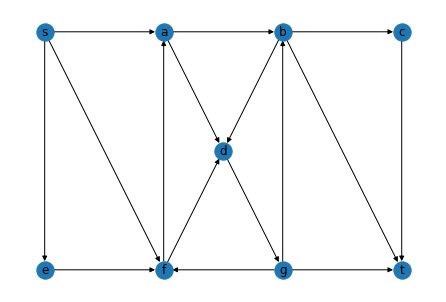

In [14]:
G3 = nx.DiGraph()
G3.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 's', 't'])
G3.add_edges_from([('s', 'a'), ('s', 'e'), ('s', 'f'), ('a', 'b'), ('a', 'd'), 
                   ('b', 'c'), ('b', 'd'), ('g', 'f'), ('d', 'g'), ('e', 'f'),
                   ('f', 'a'), ('f', 'd'), ('g', 'b'), ('b', 't'), ('c', 't'),
                   ('g', 't')])
mypos3 = {'s': (0, 20), 'a': (10, 20), 'b': (20, 20), 'c': (30, 20),
          'd': (15, 10), 'e': (0, 0), 'f': (10, 0), 'g': (20, 0), 't': (30, 0)}
nx.draw(G3, pos = mypos3, with_labels = True)

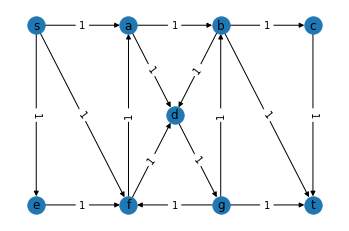

In [15]:
# 弧連結度計算を最小s,tカット問題としてモデル化する
G3n = nx.DiGraph()
G3n.add_nodes_from(G3.nodes)
G3n.add_edges_from(G3.edges, capacity = 1)
cap3n = {}
for e in G3n.edges():
    cap3n[e] = G3n.get_edge_data(*e)['capacity']
nx.draw_networkx_edge_labels(G3n, pos = mypos3, edge_labels = cap3n)
nx.draw(G3n, pos = mypos3, with_labels = True)

In [16]:
# 最大流を計算する
f3 = nx.maximum_flow(G3n, 's', 't')
print(f3)

(2, {'a': {'b': 1, 'd': 0}, 'b': {'c': 0, 'd': 0, 't': 1}, 'c': {'t': 0}, 'd': {'g': 1}, 'e': {'f': 1}, 'f': {'a': 1, 'd': 1}, 'g': {'f': 0, 'b': 0, 't': 1}, 's': {'a': 0, 'e': 1, 'f': 1}, 't': {}})


In [17]:
# 最大流を描画するための準備
G3f = nx.DiGraph()
G3f.add_nodes_from(G3n.nodes)
for v in f3[1].keys():
    for u in f3[1][v]:
        if f3[1][v][u] != 0:
            G3f.add_edge(v, u, flow = f3[1][v][u])

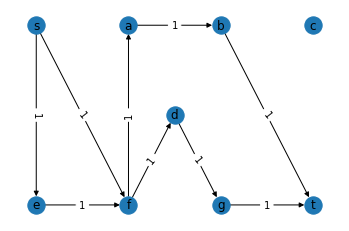

In [18]:
# 最大流の描画
cap3f = {}
for e in G3f.edges:
    cap3f[e] = G3f.get_edge_data(*e)['flow']
nx.draw_networkx_edge_labels(G3f, pos = mypos3, edge_labels = cap3f)
nx.draw(G3f, pos = mypos3, with_labels = True)

In [19]:
# 最小s,tカットの計算
c3 = nx.minimum_cut(G3n, 's', 't')
print(c3)

(2, ({'e', 'a', 'd', 'f', 's'}, {'t', 'b', 'g', 'c'}))


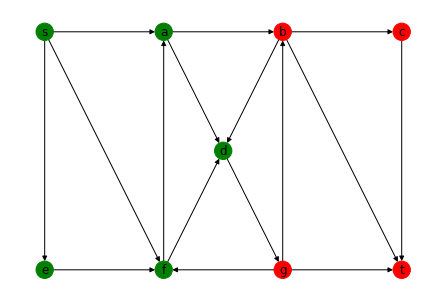

In [20]:
# 最小s,tカットの描画
nodecolor_c3 = list(map(lambda v: 'g' if v in c3[1][0] else 'r', G3n.nodes()))
nx.draw(G3n, pos = mypos3, node_color = nodecolor_c3, with_labels=True)

In [21]:
# 最小s,t非連結化集合の同定
disconnset3 = []
for e in G3.edges:
    if e[0] in c3[1][0] and e[1] in c3[1][1]:
        disconnset3.append(e)
print(disconnset3)

[('a', 'b'), ('d', 'g')]


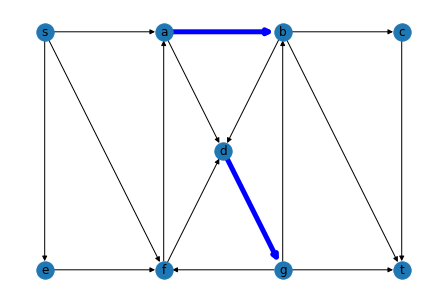

In [22]:
# 最小s,t非連結化集合の描画
color3d = []
width3d = []
for e in G3.edges:
    if e in disconnset3:
        color3d.append('blue')
        width3d.append(5)
    else:
        color3d.append('black')
        width3d.append(1)
nx.draw(G3n, pos = mypos3, edge_color = color3d, width=width3d, with_labels = True)

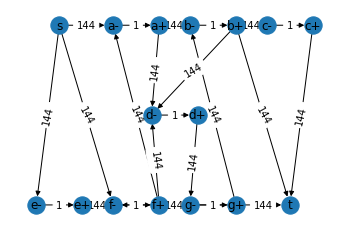

In [23]:
# 点連結度計算問題を最小s,tカット問題としてモデル化する
G3vn = nx.DiGraph()
for v in G3.nodes:
    if v != 's' and v != 't':
        G3vn.add_node(v + '+')
        G3vn.add_node(v + '-')
        G3vn.add_edge(v+'-', v+'+', capacity = 1)
    else:
        G3vn.add_node(v)
for e in G3.edges:
    if (e[0] == 's' and e[1] == 't') or (e[0] == 't' and e[1] == 's'):
        G3vn.add_edge(e[0], e[1], capacity = 1)
    elif e[0] == 's' or e[0] == 't':
        G3vn.add_edge(e[0], e[1]+'-', capacity = G3.number_of_edges() * G3.number_of_nodes())
    elif e[1] == 's' or e[1] == 't':
        G3vn.add_edge(e[0]+'+', e[1], capacity = G3.number_of_edges() * G3.number_of_nodes())
    else:
        G3vn.add_edge(e[0]+'+', e[1]+'-', capacity = G3.number_of_edges() * G3.number_of_nodes())
cap3vn = {}
for e in G3vn.edges():
    cap3vn[e] = G3vn.get_edge_data(*e)['capacity']
mypos3vn = {}
for v in G3.nodes:
    if v != 's' and v != 't':
        mypos3vn[v+'-'] = (mypos3[v][0]-3, mypos3[v][1])
        mypos3vn[v+'+'] = (mypos3[v][0]+3, mypos3[v][1])
    else:
        mypos3vn[v] = mypos3[v]
nx.draw_networkx_edge_labels(G3vn, pos = mypos3vn, edge_labels = cap3vn)
nx.draw(G3vn, pos = mypos3vn, with_labels = True)

In [24]:
# 最大流を計算する
f3v = nx.maximum_flow(G3vn, 's', 't')
print(f3v)

(2, {'a+': {'b-': 1, 'd-': 0}, 'a-': {'a+': 1}, 'b+': {'c-': 0, 'd-': 0, 't': 1}, 'b-': {'b+': 1}, 'c+': {'t': 0}, 'c-': {'c+': 0}, 'd+': {'g-': 1}, 'd-': {'d+': 1}, 'e+': {'f-': 1}, 'e-': {'e+': 1}, 'f+': {'a-': 0, 'd-': 1}, 'f-': {'f+': 1}, 'g+': {'f-': 0, 'b-': 0, 't': 1}, 'g-': {'g+': 1}, 's': {'a-': 1, 'e-': 1, 'f-': 0}, 't': {}})


In [25]:
# 最大流を描画するための準備
G3vf = nx.DiGraph()
G3vf.add_nodes_from(G3vn.nodes)
for v in f3v[1].keys():
    for u in f3v[1][v]:
        if f3v[1][v][u] != 0:
            G3vf.add_edge(v, u, flow = f3v[1][v][u])

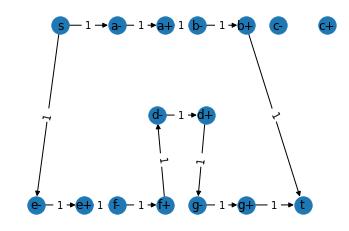

In [26]:
# 最大流の描画
cap3vf = {}
for e in G3vf.edges:
    cap3vf[e] = G3vf.get_edge_data(*e)['flow']
nx.draw_networkx_edge_labels(G3vf, pos = mypos3vn, edge_labels = cap3vf)
nx.draw(G3vf, pos = mypos3vn, with_labels = True)

In [27]:
# 最小s,tカットの計算
c3v = nx.minimum_cut(G3vn, 's', 't')
print(c3v)

(2, ({'g-', 'e-', 'd+', 'e+', 'f-', 'a+', 'b-', 's', 'f+', 'd-', 'a-'}, {'g+', 'c-', 't', 'c+', 'b+'}))


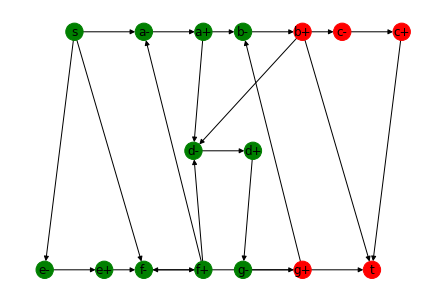

In [28]:
# 最小s,tカットの描画
nodecolor_c3v = list(map(lambda v: 'g' if v in c3v[1][0] else 'r', G3vn.nodes()))
nx.draw(G3vn, pos = mypos3vn, node_color = nodecolor_c3v, with_labels=True)

In [29]:
# 最小s,t分離集合の同定
separator3 = []
for e in G3vn.edges:
    if e[0] in c3v[1][0] and e[1] in c3v[1][1]:
        separator3.append(e[0][:1])
print(separator3)

['b', 'g']


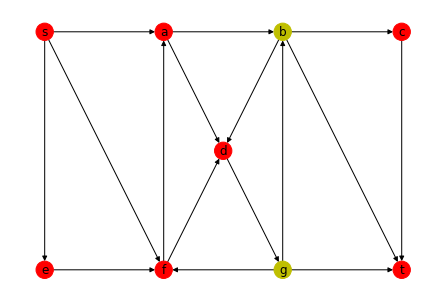

In [30]:
# 最小s,t分離集合の描画
color3s = list(map(lambda v: 'y' if v in separator3 else 'r', G3n.nodes()))
nx.draw(G3n, pos = mypos3, node_color = color3s, with_labels = True)